# Computer Science Group 3

Members:
1.	Arya Pradeep Menon (K2275592)
2.	Gudikota Dharani Kumar Gupta (K2203537)
3.	Alan Jose Tom (K2211586)
4.	Alan Vinodh (K2172630)


# Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential, load_model
from keras.layers import RandomFlip, RandomRotation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Data

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/breastmnist.npz'

In [ ]:
dataLoad = np.load(path)

In [ ]:
with dataLoad as data:
  x_train = data['train_images']
  y_train = data['train_labels']
  x_val = data['val_images']
  y_val = data['val_labels']
  x_test = data['test_images']
  y_test = data['test_labels']

# Verify no records are missing
assert not np.any(np.isnan(x_train))
assert not np.any(np.isnan(y_train))
assert not np.any(np.isnan(x_test))
assert not np.any(np.isnan(y_test))

# Plot Samples

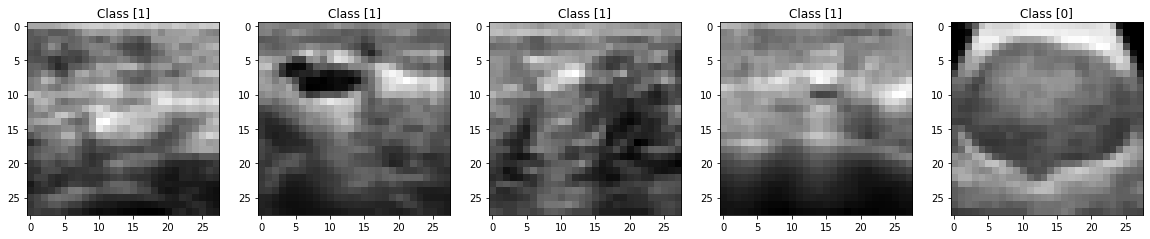

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    ax[i].imshow(x_train[i], cmap = 'gray', interpolation = 'none')
    ax[i].set_title('Class {}'.format(y_train[i]))
plt.show()

# Data Preprocessing

In [ ]:
np.random.seed(0)

In [ ]:
# Printing number of samples in each class

counts = np.bincount(y_train[:, 0])
print(counts)

[147 399]


In [ ]:
# Calculating weights for dealing class imbalance problem

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
# Reshaping and nomalizing dataset

x_train = x_train.reshape(546, 28, 28, 1)
x_val = x_val.reshape(78, 28, 28, 1)
x_test = x_test.reshape(156, 28, 28, 1)
x_train = x_train.astype('float32') /255
x_val = x_val.astype('float32') /255
x_test = x_test.astype('float32') /255


print("X_Train shape", x_train.shape)
print("X_Validation shape", x_val.shape)
print("X_Test shape", x_test.shape)
print("Y_Train shape", y_train.shape)
print("Y_Validation shape", y_val.shape)
print("Y_Test shape", y_test.shape)

X_Train shape (546, 28, 28, 1)
X_Validation shape (78, 28, 28, 1)
X_Test shape (156, 28, 28, 1)
Y_Train shape (546, 1)
Y_Validation shape (78, 1)
Y_Test shape (156, 1)


In [ ]:
# One-hot Encoder

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_val = np_utils.to_categorical(y_val, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

# Build Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [ ]:
# Defining callbacks for reducing overfitting

callbacks = [EarlyStopping(monitor="val_loss", patience=5),
             ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/Models/BreastMNIST/best_model.h5",
                             monitor="val_loss", save_best_only=True)]

# Train Model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, callbacks=callbacks, verbose=1, validation_data=(x_val, y_val))

Epoch 1/100
5/5 [==============================] - 4s 597ms/step - loss: 0.6424 - accuracy: 0.6740 - val_loss: 0.5763 - val_accuracy: 0.7308
Epoch 2/100
5/5 [==============================] - 1s 209ms/step - loss: 0.5765 - accuracy: 0.7308 - val_loss: 0.5686 - val_accuracy: 0.7308
Epoch 3/100
5/5 [==============================] - 1s 145ms/step - loss: 0.5633 - accuracy: 0.7308 - val_loss: 0.5572 - val_accuracy: 0.7308
Epoch 4/100
5/5 [==============================] - 1s 118ms/step - loss: 0.5529 - accuracy: 0.7308 - val_loss: 0.5449 - val_accuracy: 0.7308
Epoch 5/100
5/5 [==============================] - 1s 140ms/step - loss: 0.5399 - accuracy: 0.7308 - val_loss: 0.5343 - val_accuracy: 0.7308
Epoch 6/100
5/5 [==============================] - 1s 124ms/step - loss: 0.5363 - accuracy: 0.7308 - val_loss: 0.5232 - val_accuracy: 0.7308
Epoch 7/100
5/5 [==============================] - 1s 127ms/step - loss: 0.5199 - accuracy: 0.7308 - val_loss: 0.5206 - val_accuracy: 0.7436
Epoch 8/100
5

# Model Evaluation

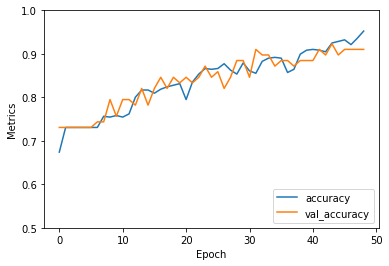

In [ ]:
# Plotting training and validation results

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model = load_model("/content/drive/MyDrive/Colab Notebooks/Models/BreastMNIST/best_model.h5")
model.save("/content/drive/MyDrive/Colab Notebooks/Models/BreastMNIST/breast1_model.h5")

In [ ]:
# Model evaluation based on validation set

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2578083872795105
Test accuracy: 0.9230769276618958


In [ ]:
# Making predictions on test set

y_pred = np.argmax(model.predict(x_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

5/5 [==============================] - 0s 10ms/step


In [ ]:
# Metrics evaluation

print(classification_report(y_test, y_pred))

print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        42
           1       0.91      0.93      0.92       114

    accuracy                           0.88       156
   macro avg       0.85      0.83      0.84       156
weighted avg       0.88      0.88      0.88       156


Confusion Matrix

[[ 31  11]
 [  8 106]]


# Dealing Class Imbalance Problem

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, class_weight = class_weight, callbacks=callbacks, verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
5/5 [==============================] - 1s 119ms/step - loss: 9.7053e-04 - accuracy: 0.9158 - val_loss: 0.2952 - val_accuracy: 0.8846
Epoch 2/50
5/5 [==============================] - 1s 115ms/step - loss: 0.0011 - accuracy: 0.8516 - val_loss: 0.3534 - val_accuracy: 0.8718
Epoch 3/50
5/5 [==============================] - 1s 111ms/step - loss: 0.0012 - accuracy: 0.8114 - val_loss: 0.3874 - val_accuracy: 0.8462
Epoch 4/50
5/5 [==============================] - 1s 130ms/step - loss: 0.0012 - accuracy: 0.8040 - val_loss: 0.3852 - val_accuracy: 0.8462
Epoch 5/50
5/5 [==============================] - 1s 111ms/step - loss: 0.0012 - accuracy: 0.8077 - val_loss: 0.3497 - val_accuracy: 0.8846
Epoch 6/50
5/5 [==============================] - 1s 113ms/step - loss: 0.0012 - accuracy: 0.8205 - val_loss: 0.3096 - val_accuracy: 0.9103


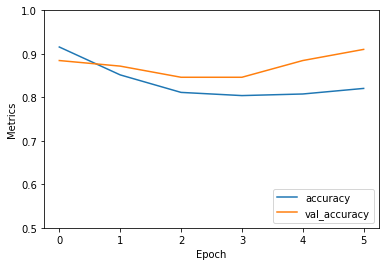

In [ ]:
# Plotting training and validation results

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model = load_model("/content/drive/MyDrive/Colab Notebooks/Models/BreastMNIST/best_model.h5")

# Image Augmentation

In [ ]:
augmentation = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)
augmentation.fit(x_train)

In [ ]:
history = model.fit(augmentation.flow(x_train, y_train, batch_size=128),epochs=50, class_weight = class_weight, callbacks=callbacks, verbose=1,validation_data=(x_val, y_val))

Epoch 1/50
5/5 [==============================] - 2s 210ms/step - loss: 0.0028 - accuracy: 0.7253 - val_loss: 0.2971 - val_accuracy: 0.8846
Epoch 2/50
5/5 [==============================] - 1s 121ms/step - loss: 0.0028 - accuracy: 0.6868 - val_loss: 0.3653 - val_accuracy: 0.8718
Epoch 3/50
5/5 [==============================] - 1s 126ms/step - loss: 0.0027 - accuracy: 0.6630 - val_loss: 0.4191 - val_accuracy: 0.8462
Epoch 4/50
5/5 [==============================] - 1s 116ms/step - loss: 0.0028 - accuracy: 0.6300 - val_loss: 0.4507 - val_accuracy: 0.8077
Epoch 5/50
5/5 [==============================] - 1s 221ms/step - loss: 0.0026 - accuracy: 0.6300 - val_loss: 0.4600 - val_accuracy: 0.8077
Epoch 6/50
5/5 [==============================] - 1s 219ms/step - loss: 0.0026 - accuracy: 0.6337 - val_loss: 0.4475 - val_accuracy: 0.8333


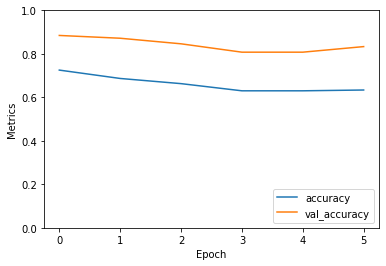

In [ ]:
# Plotting training and validation results

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Reference

Liang, X. (2023) MNIST_in_Keras.ipynb. Available at: https://kingston.app.box.com/s/5k5eqgwzlp5mf2w7y3jh0lkzqmm0j76u (Accessed: Mar 5, 2023).